# Problema simples com duas variaveis



\begin{matrix}
maximize~z = & x + 2y & \\
sujeito~a & 2x + y \leq 20 & (eq.2) \\
 & -4x + 5y \leq 10 & (eq.3) \\
 & -x + 2y \ge -2 & (eq.4) \\
 & -x + 5y = 15 & (eq.5) \\
 & x \ge 0 \\
 & y \ge 0
\end{matrix}

Vamos utilizar um pacote científico para Python para resolver o problema de programação linear descrito acima.
Este pacote é chamado SciPy e pode ser instalado facilmente utilizando **pip**:

> pip install scipy

Ele é um pacote de uso geral para computação científica com Python que fornecer uma funcao denominada *linprog()* para resolver este tipo de problema. Contudo *linprog()* possui algumas limitações:
1. lida apenas problemas de minimização (não de maximização) e 
2. não permite restrições de desigualdade com sinal de maior ou igual a (≥). 

Para contornar esses problemas, você precisa modificar seu problema antes de iniciar a otimização:

- Em vez de maximizar $z = x + 2y$, você pode minimizar seu negativo $(−z = −x − 2y)$.
- Em vez de ter o sinal de maior ou igual, você pode multiplicar a desigualdade amarela por -1 e obter o sinal oposto de menor ou igual ($\leq$).

In [1]:
from scipy.optimize import linprog
import matplotlib.pyplot as plt

### Função

scipy.optimize.__linprog__(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='highs', callback=None, options=None, x0=None, integrality=None)


### Definições

- **c** contém os coeficientes da função objetivo.
- **A_ub** contém os coeficientes do lado esquerdo das restrições de desigualdade (vermelho, azul e amarelo).
- **b_ub** contém os coeficientes do lado direito das restrições de desigualdade (vermelho, azul e amarelo).
- **A_eq** contém os coeficientes do lado esquerdo da restrição de igualdade (verde).
- **b_eq** contém os coeficientes do lado direito da restrição de igualdade (verde).

In [2]:
c = [-1, -2]
#      ─┬  ─┬
#       │   └┤ coeficiente de y
#       └────┤ coeficiente de  x

# Para as inequações:
A_ub = [[ 2,  1],  # coeficientes da restrição Eq.2 (lado esquerdo)
        [-4,  5],  # coeficientes da restrição Eq.3 (lado esquerdo)
        [ 1, -2]]  # coeficientes da restrição Eq.4 (lado esquerdo)

b_ub = [20,  # constante da restrição Eq.2 (lado direito)
        10,  # constante da restrição Eq.3 (lado direito)
        2]   # constante da restrição Eq.4 (lado direito)

# Para a equação (só Eq. 5)
A_eq = [[-1, 5]]  # Green constraint left side
b_eq = [15]       # Green constraint right side

- note que os coeficientes da Eq.4 estão alterados para atender à restrição do linprog() de trabalhar somente com $\leq$

In [4]:
bounds = [(0, float("inf")),  # Bounds of x
          (0, float("inf"))]  # Bounds of y

In [5]:
opt = linprog(c=c, 
              A_ub=A_ub, b_ub=b_ub,
              A_eq=A_eq, b_eq=b_eq, 
              bounds=bounds,
              method="revised simplex")

/tmp/ipykernel_7060/2538537233.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=c,


O parâmetro **c** refere-se aos coeficientes da função objetivo.

**A_ub** e **b_ub** são relacionados aos coeficientes dos lados esquerdo e direito das restrições de desigualdade, respectivamente. 

Da mesma forma, **A_eq** e **b_eq** referem-se a restrições de igualdade. 

Você pode usar limites **bounds** para fornecer os limites inferior e superior nas variáveis de decisão.

In [6]:
opt

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.818181818181817
       x: [ 7.727e+00  4.545e+00]
     nit: 3

**message** é o status da solução.

**success** é uma flag que mostra se a solução ótima foi encontrada ou não.

**status** é um número inteiro entre 0 e 4 que mostra o status da solução, como 0 para quando a solução ideal foi encontrada.

**fun** é o valor da função objetivo no ótimo (se encontrado).

**x** é uma matriz contendo os valores ideais das variáveis de decisão.

**nit** é o número de iterações necessárias para concluir o cálculo.

In [7]:
print(opt.fun)
print(opt.success)
print(opt.x)

-16.818181818181817
True
[7.72727273 4.54545455]


$\begin{matrix}
(eq.2) & 2x + y \leq 20 &  \rightarrow y \leq 20 - 2x \\
(eq.3) & -4x + 5y \leq 10 &  \rightarrow y \leq \frac{10 + 4x}{5} \\
(eq.4) & -x + 2y \ge -2 & \rightarrow y \ge \frac{x - 2}{2} \\
(eq.5) & -x + 5y = 15 & \rightarrow y = \frac{15 + x}{5} \\
\end{matrix}
$

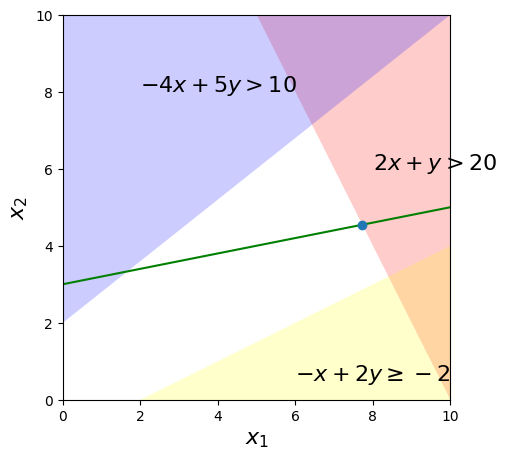

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

f2 = lambda x: 20 - 2 * x
f3 = lambda x: (10 + 4 * x) / 5
f4 = lambda x: (x - 2) / 2
f5 = lambda x: (15 + x) / 5

# Eq.2
plt.fill([0, 100, 100, 0],[f2(0), f2(100), 100, 100], 'red', alpha=0.2)
plt.text(8, 6, "$2x + y > 20$", fontsize=16)

# Eq.3
plt.fill([0, 100, 100, 0],[f3(0), f3(100), 100, 100], 'blue', alpha=0.2)
plt.text(2, 8, "$-4x + 5y > 10$", fontsize=16)

# Eq. 4
plt.fill([2, 100, 100, 2],[f4(2), f4(2), f4(100), f4(2)], 'yellow', alpha=0.2)
plt.text(6, 0.5, "$-x + 2y \geq -2$", fontsize=16)

# Eq. 5
plt.plot([0, 100], [f5(0), f5(100)], color="green")


# solucao
plt.plot([opt.x[0]], [opt.x[1]], marker="o")

plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

A solução do sistema de equações consiste nos pontos na reta verde que estão dentro da área branca.
Precisamos agora achar entre estes pontos que maximiza $x + 2y$, como é uma reta crescente, esperamos que a solução seja o ponto mais alto da reta dentro da área selecionada.


Observamos que a solucao encontrada por **linprog()** está indicada pelo pequeno disco na reta e esta corresponde ao valor esperado.

***

# Problema de Alocação de Recursos

Vamos ver aqui um problema de otimização mais concreto e prático relacionado à alocação de recursos na manufatura.
Digamos que uma fábrica produza quatro produtos diferentes e que a quantidade produzida diariamente do primeiro produto seja x₁, a quantidade produzida do segundo produto seja x₂ e assim por diante. O objetivo é determinar a quantidade de produção diária maximizadora de lucro para cada produto, tendo em mente as seguintes condições:

- O lucro por unidade de produto é \\\$ 20, \\\$ 12, \\\$ 40 e \\\$ 25 para o primeiro, segundo, terceiro e quarto produto, respectivamente.

- Devido a restrições de mão de obra, o número total de unidades produzidas por dia não pode exceder cinquenta.

- Para cada unidade do primeiro produto, são consumidas três unidades da matéria-prima A. Cada unidade do segundo produto requer duas unidades da matéria-prima A e uma unidade da matéria-prima B. Cada unidade do terceiro produto requer uma unidade de A e duas unidades de B. Finalmente, cada unidade do quarto produto requer três unidades de b.

- Devido às restrições de transporte e armazenamento, a fábrica pode consumir até cem unidades da matéria-prima A e noventa unidades da matéria-prima B por dia.

O modelo matemático pode ser definido assim:

\begin{matrix}
maximize & 20x_1 + 12x_2 + 40x_3 + 25x_4 & (lucro) \\
sujeito~a & x_1 + x_2 + x_3 + x_4 \leq 50 & (mão ~de ~obra) \\
 & 3x_1 + 2x_2 + x_3 \leq 100 & (material ~A) \\
 & x_2 + 2x_3 + 3x_4 \leq 90 & (material ~B)\\
 & x_1, x_2, x_3, x_4 \ge 0
\end{matrix}

A função objetivo (lucro) é definida na condição 1. A restrição de mão de obra aparece na condição 2. As restrições sobre as matérias-primas A e B estão descritas nas condições 3 e 4, que somam as necessidades de matéria-prima para cada produto.
Finalmente, como os valores dos produtos não podem ser negativos (não tem como produzir -1 produto, não é?), então todas as variáveis de decisão devem ser maiores ou iguais a zero.

Ao contrário do exemplo anterior, não temos como visualizar este problema porque ele possui quatro variáveis de decisão. No entanto, os princípios permanecem os mesmos independentemente da dimensionalidade do problema.

In [9]:
obj = [-20, -12, -40, -25]

lhs_ineq = [[1, 1, 1, 1],  # mao de obra
            [3, 2, 1, 0],  # Material A
            [0, 1, 2, 3]]  # Material B

rhs_ineq = [ 50,  # Manpower
            100,  # Material A
             90]  # Material B

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")
opt

/tmp/ipykernel_7060/1811532856.py:11: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, method="revised simplex")


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1900.0
       x: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
     nit: 2

**Note** que não indicamos (não foi preciso) os limites para as variaveis para obter a resposta correta.
Mas para ter certeza, vamos acrescentar os limites como definidos abaixo:

In [10]:
# Bounds
bnd = [(0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
       (0, float("inf")),
      ]  

In [11]:
# Aqui trocamos o método para demonstrar que o resultado final é o mesmo (é remover o warning)
# para mais informações: https://docs.scipy.org/doc/scipy/reference/optimize.linprog-highs.html
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="highs")
opt

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -1900.0
              x: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
            nit: 4
          lower:  residual: [ 5.000e+00  0.000e+00  4.500e+01  0.000e+00]
                 marginals: [ 0.000e+00  1.800e+01  0.000e+00  2.500e+01]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  4.000e+01  0.000e+00]
                 marginals: [-2.000e+01 -0.000e+00 -1.000e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [12]:
opt.x

array([ 5.,  0., 45.,  0.])

In [13]:
opt.slack

array([ 0., 40.,  0.])

#### Comentários:

- O terceiro produto traz o maior lucro por unidade, então a fábrica produzirá mais.

- A primeira folga é 0, o que significa que os valores dos lados esquerdo e direito da restrição de mão de obra (primeira) são os mesmos. A fábrica produz 50 unidades por dia, e essa é sua capacidade total.

- A segunda folga é 40 porque a fábrica consome 60 unidades da matéria-prima A (15 unidades para o primeiro produto mais 45 para o terceiro) de um potencial de 100 unidades.

- A terceira folga é 0, o que significa que a fábrica consome todas as 90 unidades da matéria-prima B. Toda essa quantidade é consumida para o terceiro produto. É por isso que a fábrica não pode produzir o segundo ou quarto produto e não pode produzir mais de 45 unidades do terceiro produto. Falta a matéria-prima B.